In [1]:
import numpy as np
import pandas as pd
#pd.options.mode.chained_assignment=None
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
#import and merge datasets
results = pd.read_csv("results.csv",names=['result_id','race_id','driver_id','constructor_id','number','grid','position', 'position_text','position_order','points','laps','time','milliseconds','fastest_lap','rank','fastest_lap_time','fastest_lap_speed','status_id'],header=None)
races = pd.read_csv("races.csv",names=['race_id','year','round','circuit_id','name','date','time','url'],header=None)
drivers = pd.read_csv("drivers.csv",names=['driver_id','driver_ref','number','code','forename','surname','dob','nationality','url'],header=None)
constructors = pd.read_csv("constructors.csv",names=['constructor_id', 'constructor_ref','name','nationality', 'url'],header=None)

In [5]:
#merging datasets
df = pd.merge(results,races[['race_id','year','name','round']],on = 'race_id',how='left')
df = pd.merge(df, drivers[['driver_id','driver_ref','nationality']],on = 'driver_id',how='left')
df = pd.merge(df, constructors[['constructor_id','name','nationality']],on = 'constructor_id',how='left')


In [6]:
df.drop(['number','position','position_text','laps','fastest_lap','status_id','result_id','race_id','driver_id','constructor_id'], axis=1,inplace=True )

In [7]:
df.rename(columns={'rank':'fastest_lap_rank','name_x':'gp_name','nationality_x':'driver_nationality','name_y':'constructor_name','nationality_y':'constructor_nationality','driver_ref':'driver'},inplace = True)

In [8]:
df = df[['year','gp_name','round', 'driver','constructor_name','grid', 'position_order', 'points','time', 'milliseconds', 'fastest_lap_rank', 'fastest_lap_time', 'fastest_lap_speed','driver_nationality','constructor_nationality']]

In [11]:
df =df[df['year']!=2019]
df =df[df['year']!=2020]
df =df[df['year']!=2021]
df =df[df['year']!=2022]
df =df[df['year']!=2023]
df =df[df['year']!=2024]

In [12]:
df = df.sort_values(by=['year','round','position_order'], ascending = [False, True, True])

In [ ]:
df.time.replace('\\N',np.nan,inplace=True)
df.milliseconds.replace('\\N',np.nan,inplace=True)
df.fastest_lap_rank.replace('\\N',np.nan,inplace=True)
df.fastest_lap_time.replace('\\N',np.nan,inplace=True)
df.fastest_lap_speed.replace('\\N',np.nan,inplace=True)

In [13]:
df['fastest_lap_speed'] = pd.to_numeric(df['fastest_lap_speed'], errors='coerce')
df['fastest_lap_rank'] = pd.to_numeric(df['fastest_lap_rank'], errors='coerce')
df['milliseconds'] = pd.to_numeric(df['milliseconds'], errors='coerce')

In [14]:
df.fastest_lap_speed = df.fastest_lap_speed.astype(float)
df.fastest_lap_rank = df.fastest_lap_rank.astype(float)
df.milliseconds = df.milliseconds.astype(float)

In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df.shape

(26081, 15)

In [17]:
pd.__version__

'2.1.4'

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26081 entries, 0 to 26080
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     26081 non-null  object 
 1   gp_name                  26081 non-null  object 
 2   round                    26081 non-null  object 
 3   driver                   26081 non-null  object 
 4   constructor_name         26081 non-null  object 
 5   grid                     26081 non-null  object 
 6   position_order           26081 non-null  object 
 7   points                   26081 non-null  object 
 8   time                     7252 non-null   object 
 9   milliseconds             7250 non-null   float64
 10  fastest_lap_rank         7831 non-null   float64
 11  fastest_lap_time         7616 non-null   object 
 12  fastest_lap_speed        7615 non-null   float64
 13  driver_nationality       26081 non-null  object 
 14  constructor_nationalit

In [23]:
df.head(8)

,year,gp_name,round,driver,constructor_name,grid,position_order,points,time,milliseconds,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,driver_nationality,constructor_nationality
0,year,name,round,driverRef,name,grid,position_order,points,time,NaN,NaN,fastestLapTime,NaN,nationality,nationality
1,2023,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,1,25,33:56.7,5636736.0,6.0,01:36.2,202.452,Dutch,Austrian
2,2023,Bahrain Grand Prix,1,albon,Williams,15,10,1,+1:29.774,5726510.0,15.0,01:37.1,200.559,Thai,British
3,2023,Bahrain Grand Prix,1,tsunoda,AlphaTauri,14,11,0,+1:30.870,5727606.0,12.0,01:36.6,201.612,Japanese,Italian
4,2023,Bahrain Grand Prix,1,sargeant,Williams,16,12,0,NaN,NaN,4.0,01:36.0,202.871,American,British
5,2023,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,17,13,0,NaN,NaN,8.0,01:36.5,201.959,Danish,American
6,2023,Bahrain Grand Prix,1,de_vries,AlphaTauri,19,14,0,NaN,NaN,19.0,01:37.7,199.400,Dutch,Italian
7,2023,Bahrain Grand Prix,1,hulkenberg,Haas F1 Team,10,15,0,NaN,NaN,11.0,01:36.6,201.656,German,American


In [20]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize']=20,15

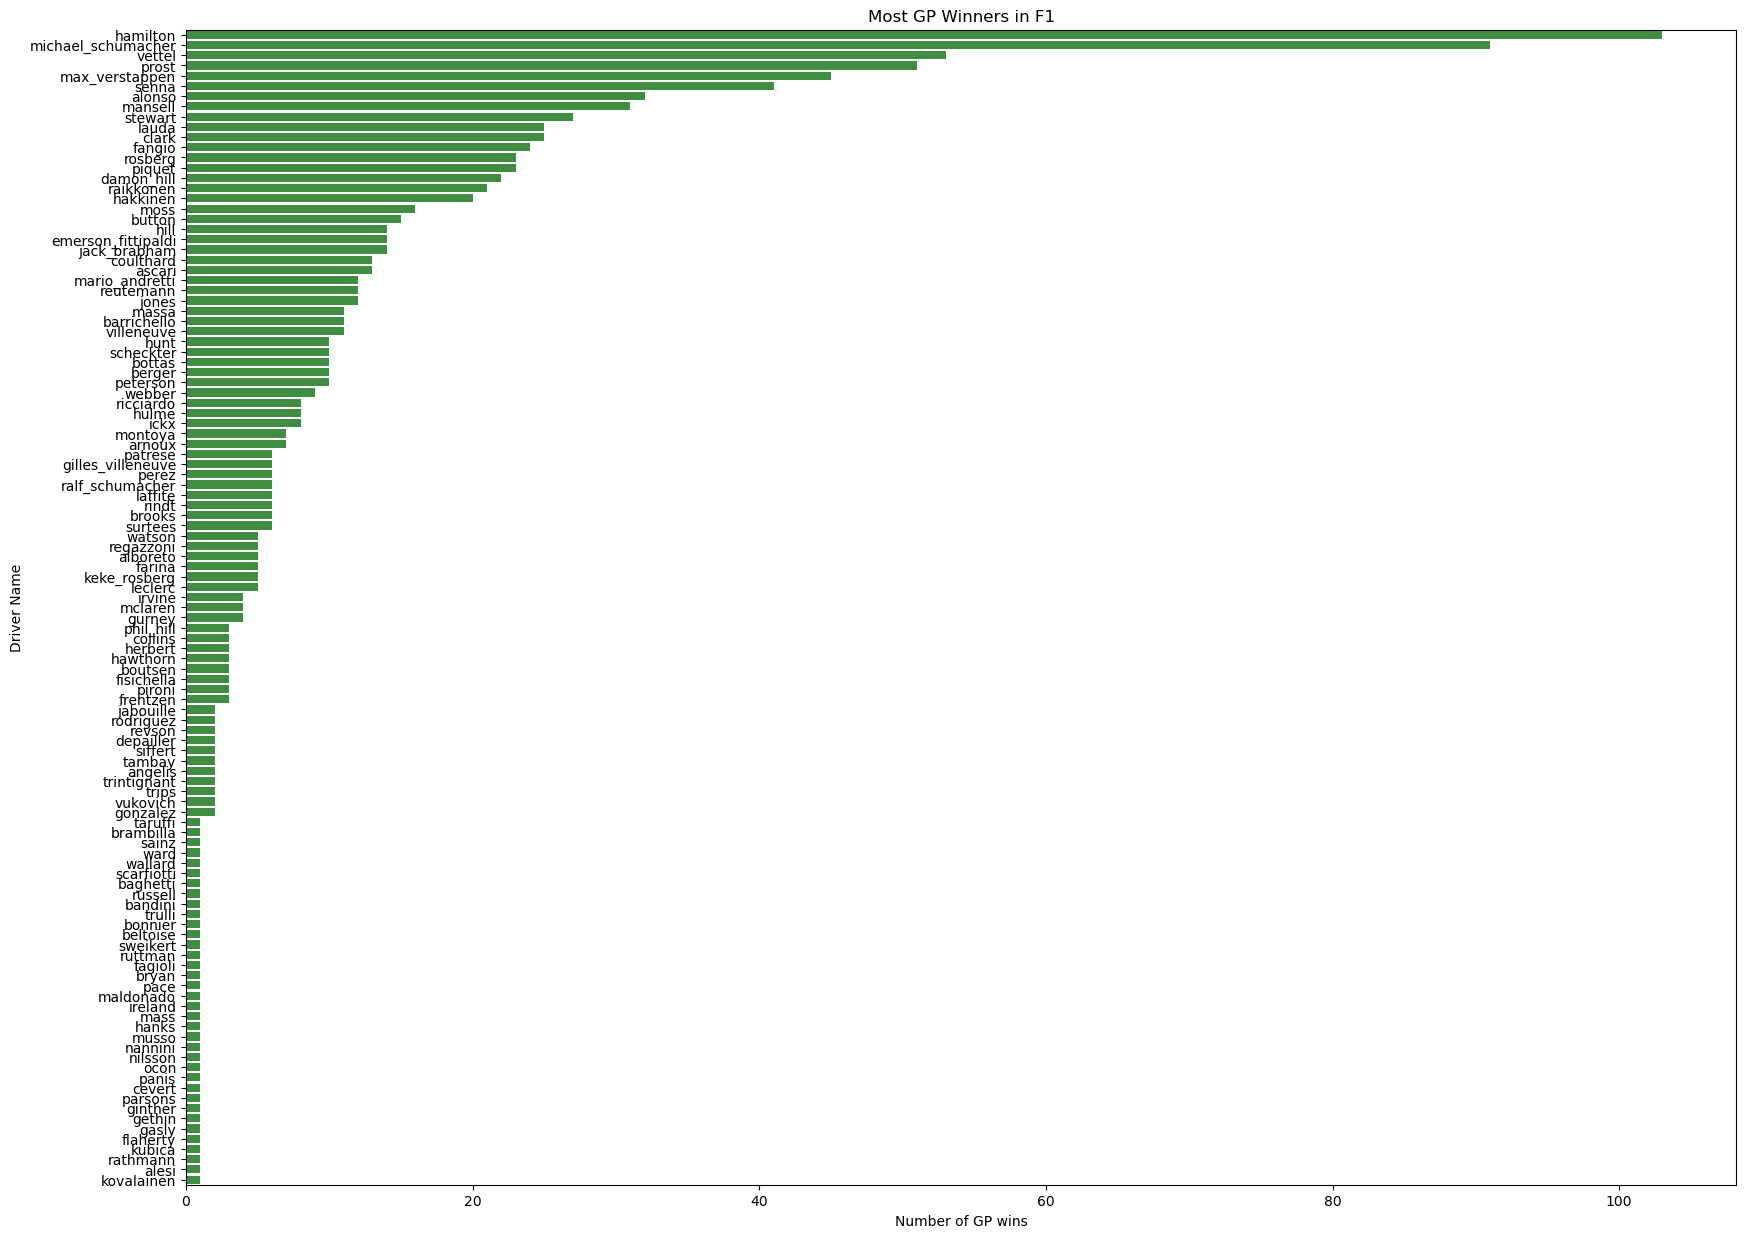

In [62]:
driver_winner = df.loc[df['position_order']=='1'].groupby('driver')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()
sb.barplot(data=driver_winner, y='driver', x='position_order',color='green', alpha=0.8)
plt.title('Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')
plt.yticks()
plt.show()

In [63]:
t10drivers=driver_winner.head(10)
print(t10drivers)

               driver  position_order
0            hamilton             103
1  michael_schumacher              91
2              vettel              53
3               prost              51
4      max_verstappen              45
5               senna              41
6              alonso              32
7             mansell              31
8             stewart              27
9               lauda              25


Text(0, 0.5, 'DRIVER NAME')

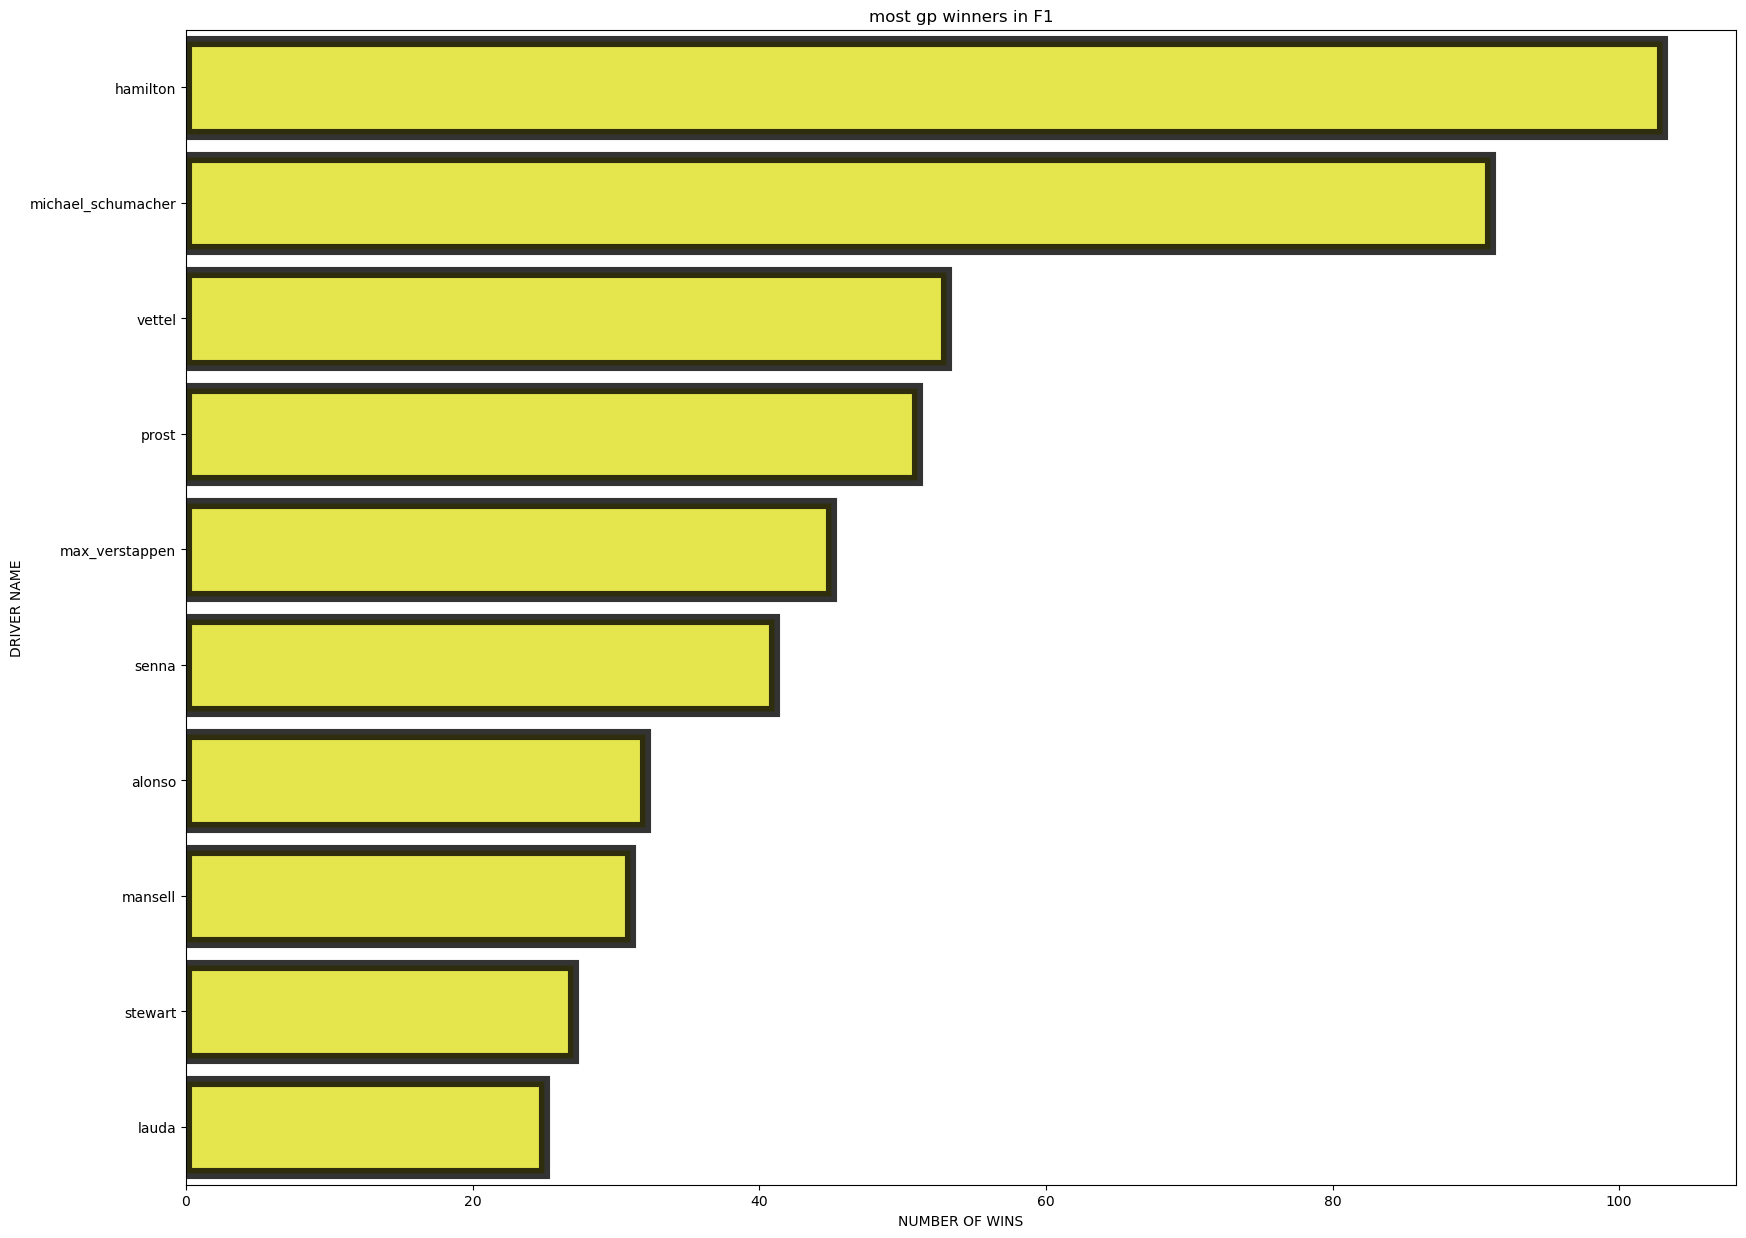

In [64]:
sb.barplot(data= t10drivers,y='driver', x='position_order',color='yellow',alpha=0.8,linewidth=8,edgecolor='black')
plt.title('most gp winners in F1')
plt.xlabel('NUMBER OF WINS')
plt.ylabel('DRIVER NAME')


Text(0.5, 0, 'Number of wins')

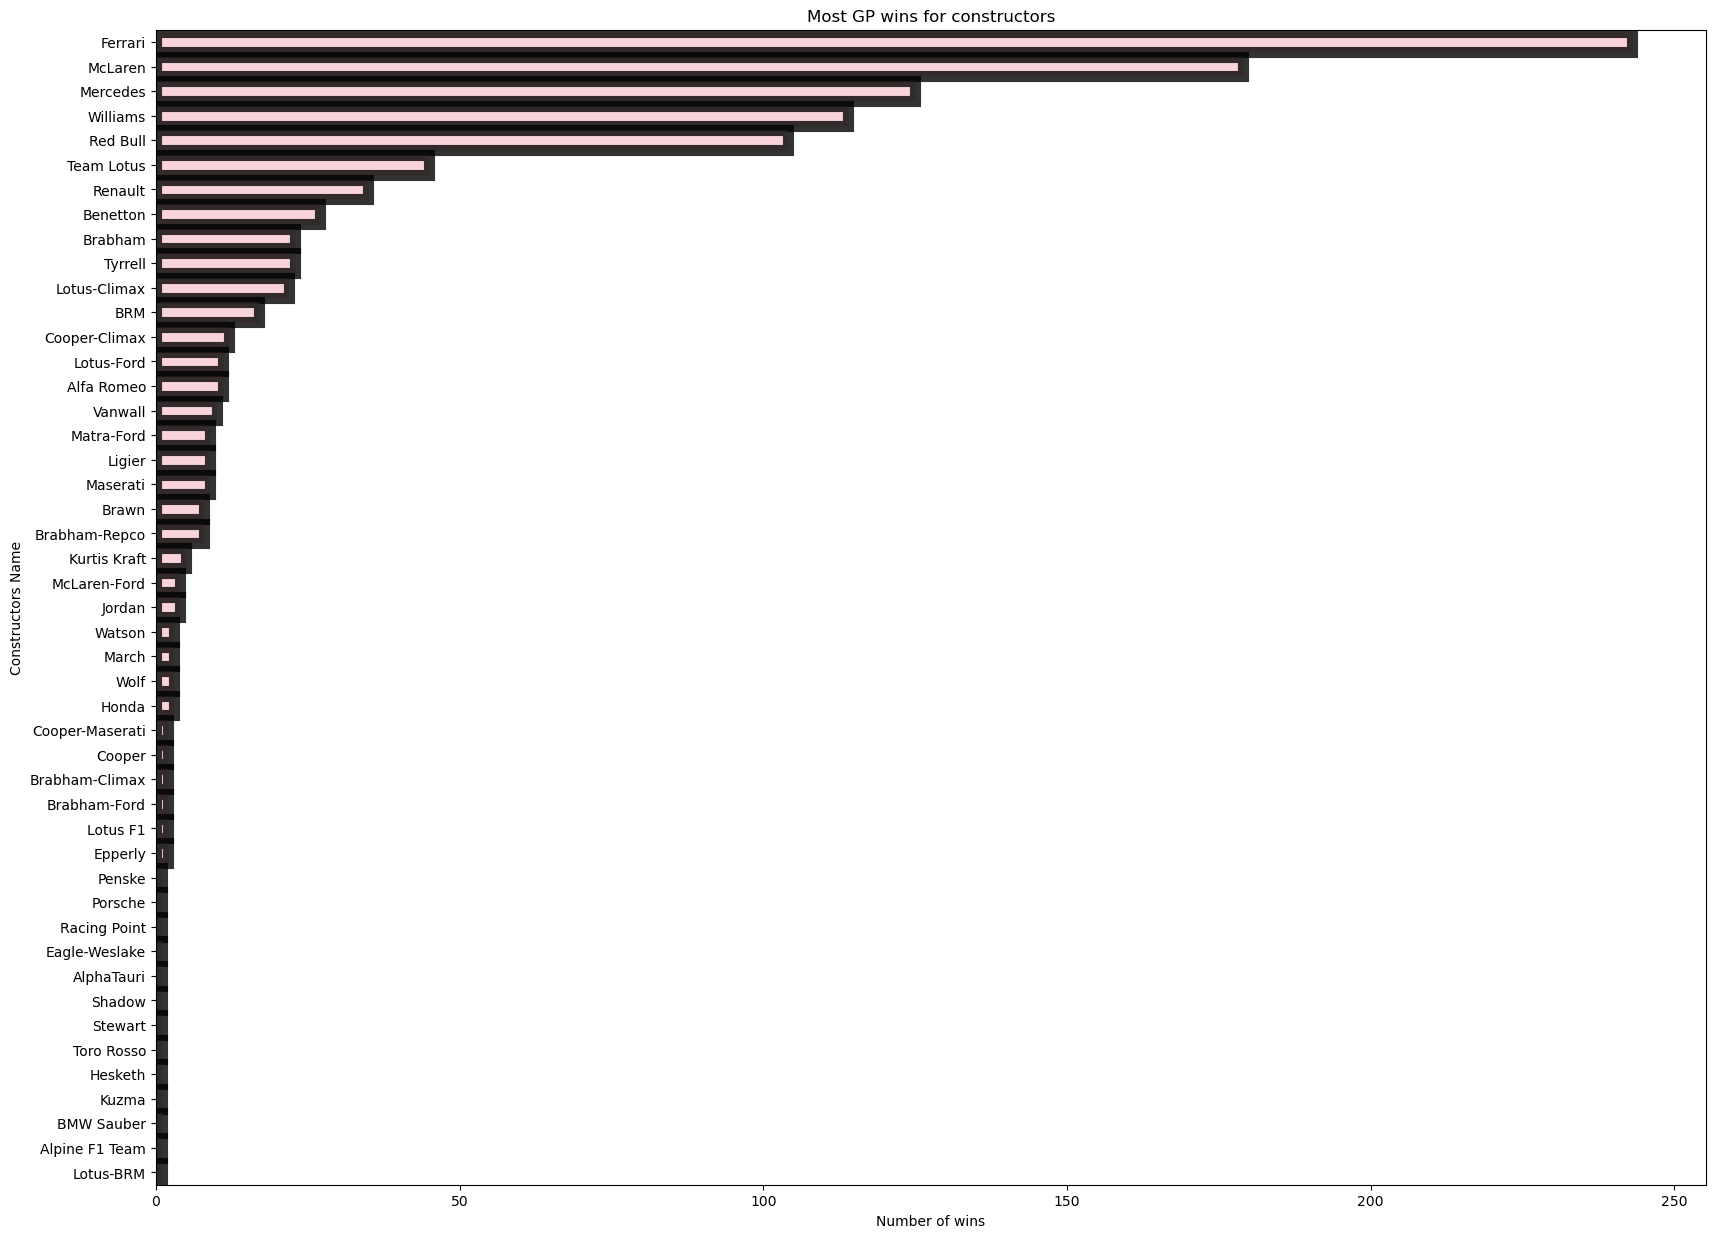

In [65]:
constructor_winner = df.loc[df['position_order'] =='1'].groupby('constructor_name')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()
sb.barplot(data = constructor_winner, y = 'constructor_name', x= 'position_order', color = 'pink', alpha = 0.8, linewidth=8, edgecolor="black")
plt.title('Most GP wins for constructors')
plt.ylabel('Constructors Name')
plt.xlabel('Number of wins')

In [66]:
t10constructors=constructor_winner.head(10)
print(t10constructors)

  constructor_name  position_order
0          Ferrari             243
1          McLaren             179
2         Mercedes             125
3         Williams             114
4         Red Bull             104
5       Team Lotus              45
6          Renault              35
7         Benetton              27
8          Brabham              23
9          Tyrrell              23


Text(0, 0.5, 'constuctor names')

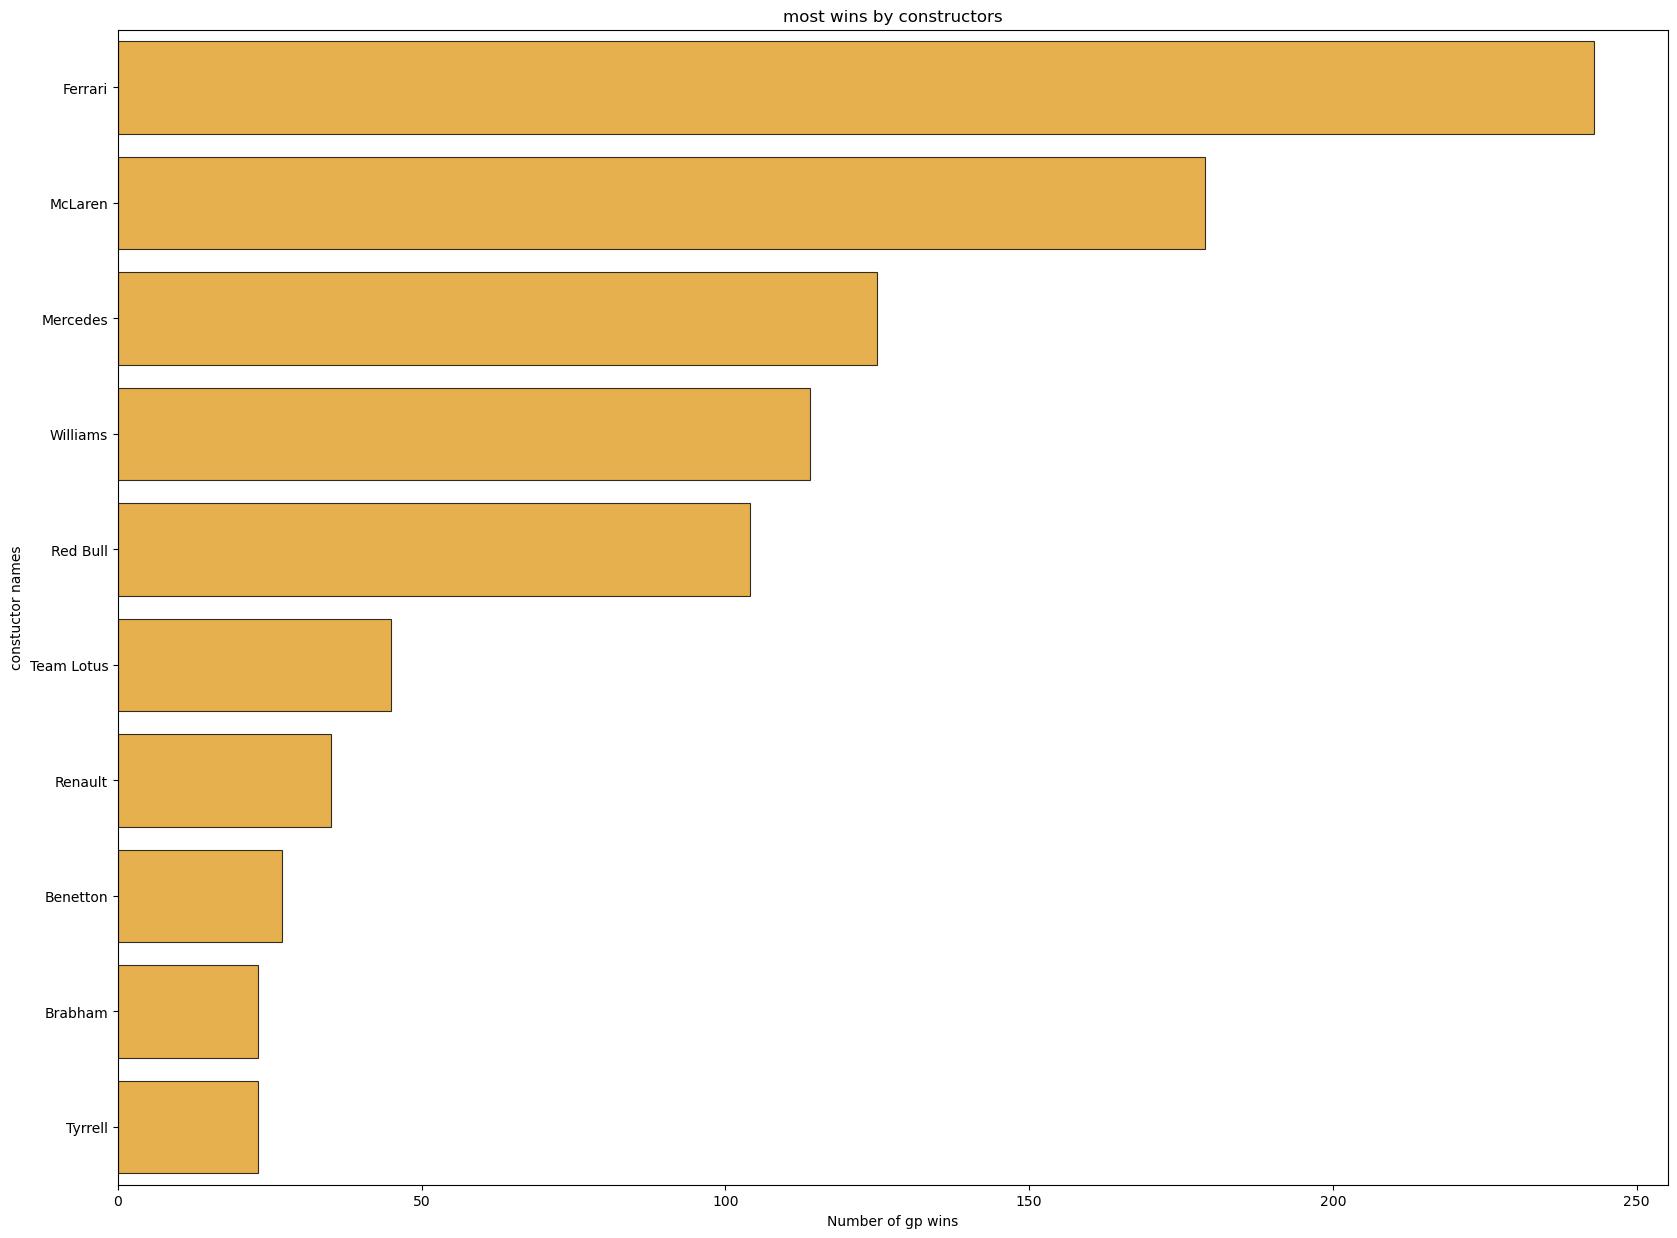

In [67]:
sb.barplot(data=t10constructors, y='constructor_name',x='position_order',color='orange',alpha=0.8,linewidth=.8,edgecolor='black')
plt.title('most wins by constructors')
plt.xlabel('Number of gp wins')
plt.ylabel('constuctor names')

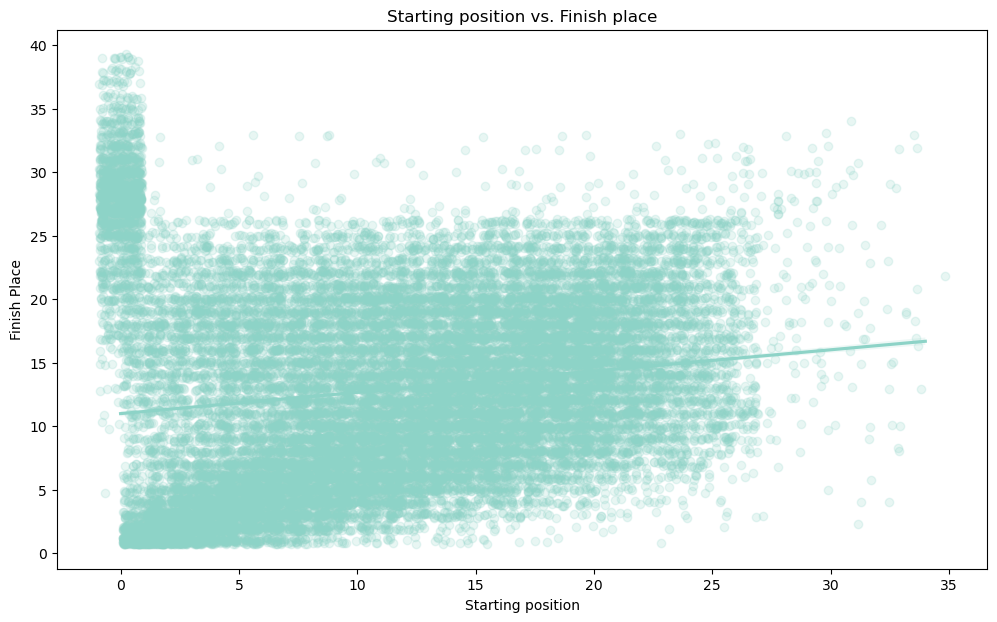

In [68]:
df_no_zero = df[df['grid'] != 0]
df['grid'] = pd.to_numeric(df['grid'], errors='coerce')
df['position_order'] = pd.to_numeric(df['position_order'], errors='coerce')
df_no_nan = df.dropna(subset=['grid', 'position_order'])
plt.figure(figsize=[12, 7])
sb.regplot(data=df_no_nan, x='grid', y='position_order', x_jitter=0.9, y_jitter=0.3, scatter_kws={'alpha': 1/5})
plt.title('Starting position vs. Finish place')
plt.ylabel('Finish Place')
plt.xlabel('Starting position')
plt.show()


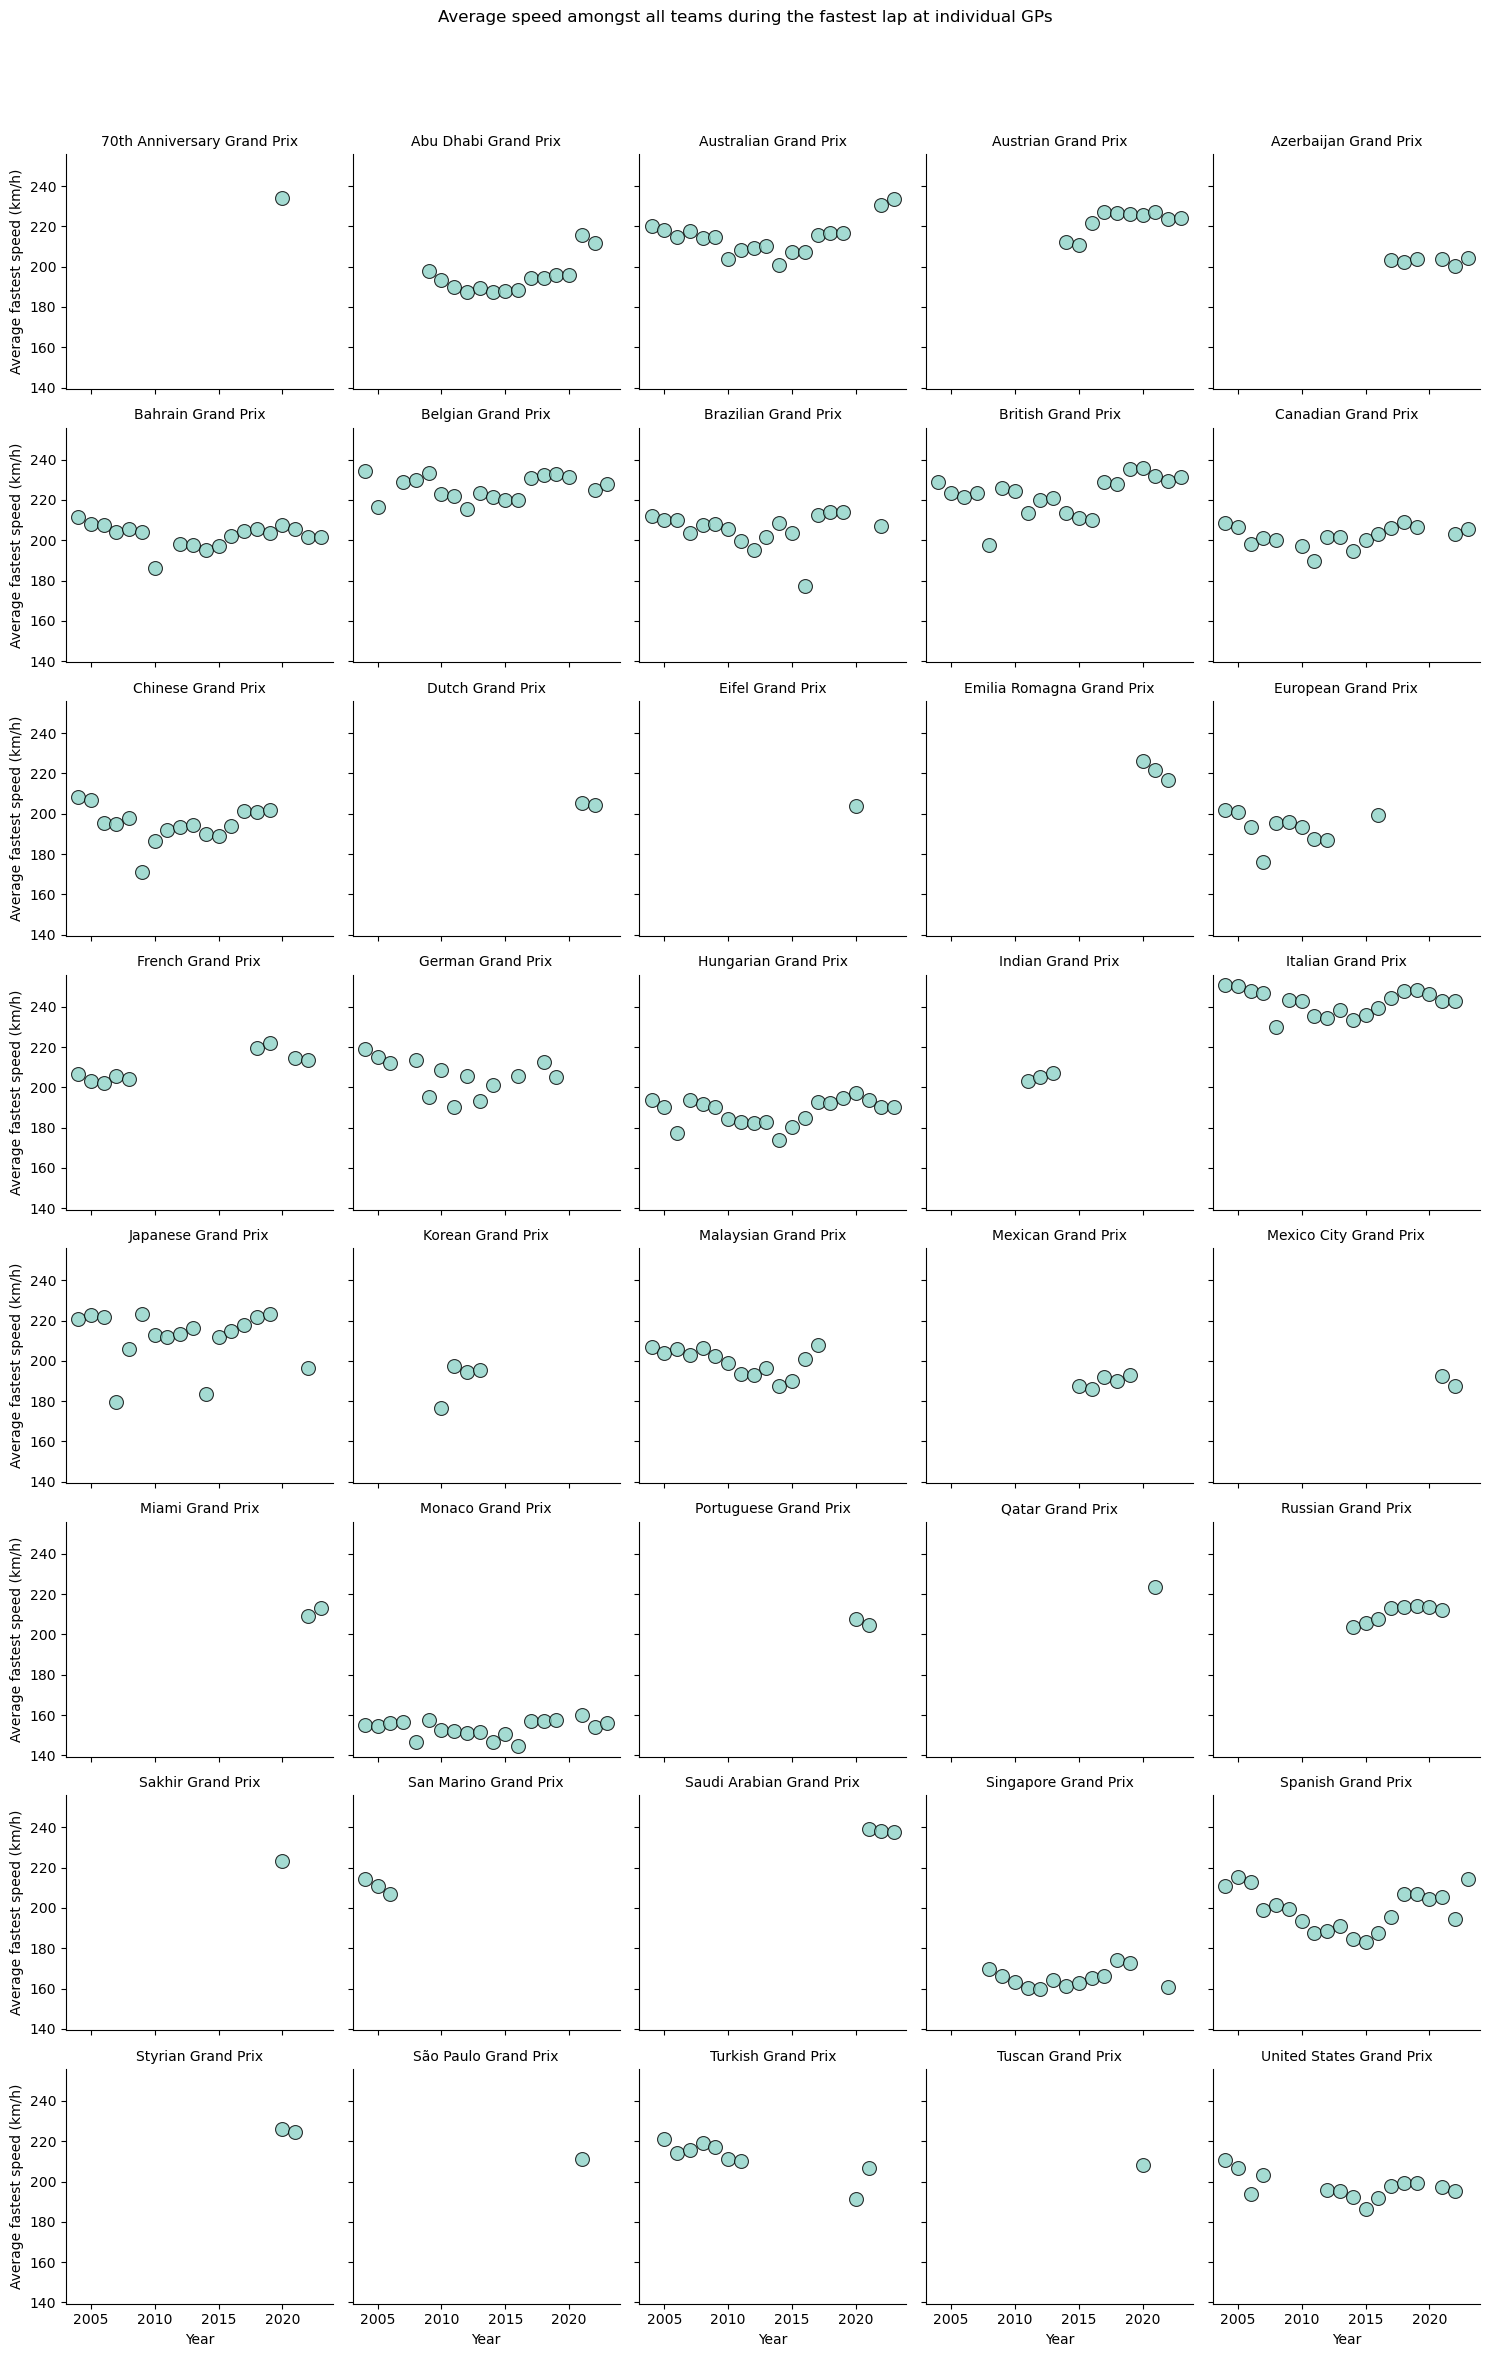

In [72]:
df_speed= df[df['year'] >= 2004]
df_group_speed= df_speed.groupby(['gp_name', 'year'])['fastest_lap_speed'].mean().to_frame().reset_index()
g=sb.FacetGrid(data = df_group_speed, col = 'gp_name',col_wrap=5)
g.map(plt.scatter, 'year','fastest_lap_speed', alpha= 0.8, linewidth=.8, edgecolor="black", s = 100)
g.set_titles("{col_name}")
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/h)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed amongst all teams during the fastest lap at individual GPs');

C:\Users\roach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\roach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


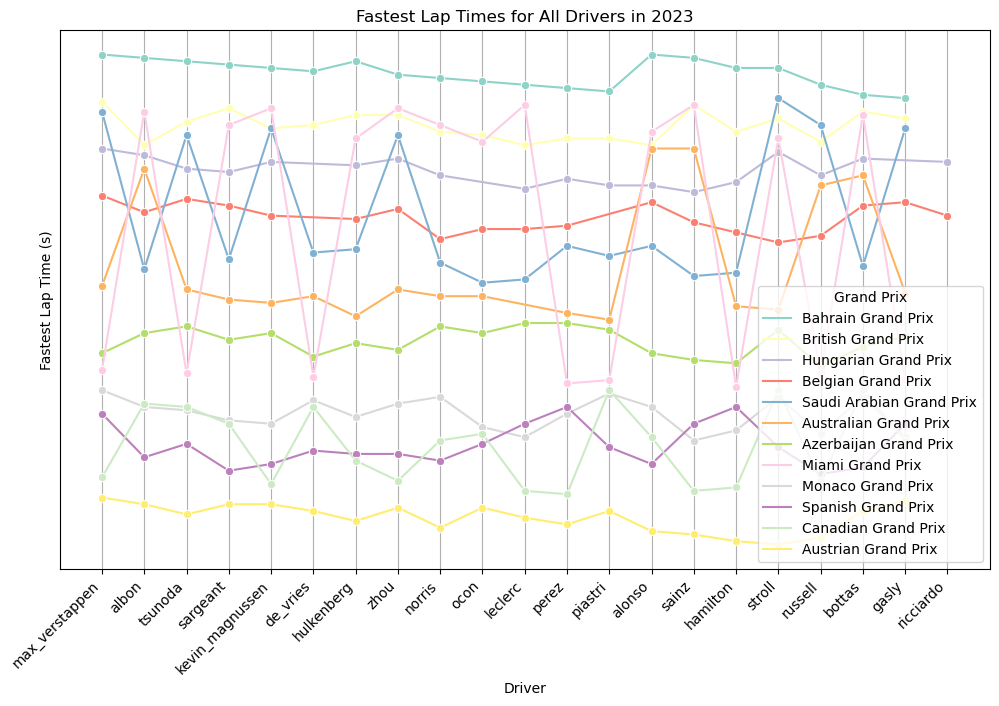

In [73]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df_2023 = df[df['year'] == 2023]
plt.figure(figsize=[12, 7])
sb.lineplot(data=df_2023, x='driver', y='fastest_lap_time', hue='gp_name', marker='o')
plt.title('Fastest Lap Times for All Drivers in 2023')
plt.xlabel('Driver')
plt.ylabel('Fastest Lap Time (s)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks([])
plt.legend(title='Grand Prix')
plt.grid()
plt.show()


Number of rows for Hamilton: 322


C:\Users\roach\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


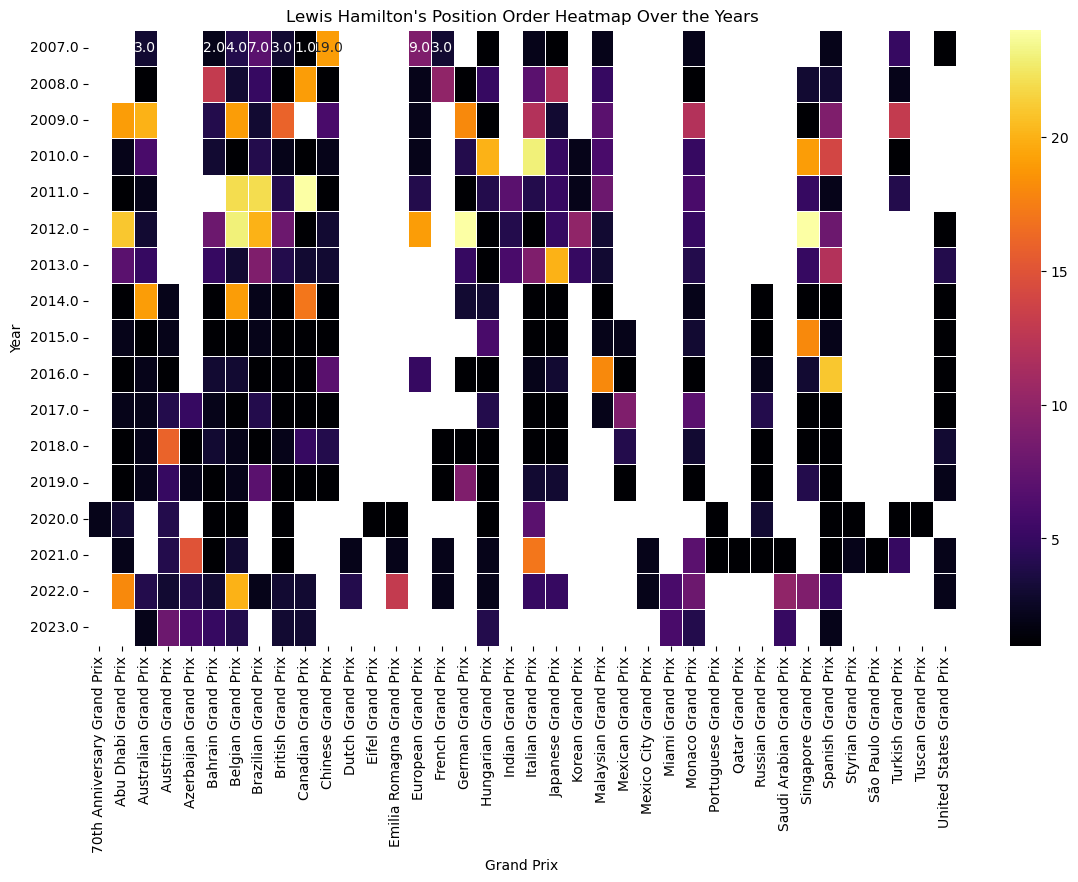

In [74]:
df_hamilton = df[(df['driver'] == 'hamilton') & (df['position_order'].notnull())]
print("Number of rows for Hamilton:", len(df_hamilton))
heatmap_data = df_hamilton.pivot_table(index='year', columns='gp_name', values='position_order', aggfunc='mean')
plt.figure(figsize=(14, 8))
sb.heatmap(heatmap_data, cmap='inferno', annot=True, fmt=".1f", linewidths=.5)
plt.title("Lewis Hamilton's Position Order Heatmap Over the Years")
plt.xlabel('Grand Prix')
plt.ylabel('Year')
plt.show()


Number of rows for michael_schumacher: 308
Pivot table shape: (19, 30)


C:\Users\roach\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


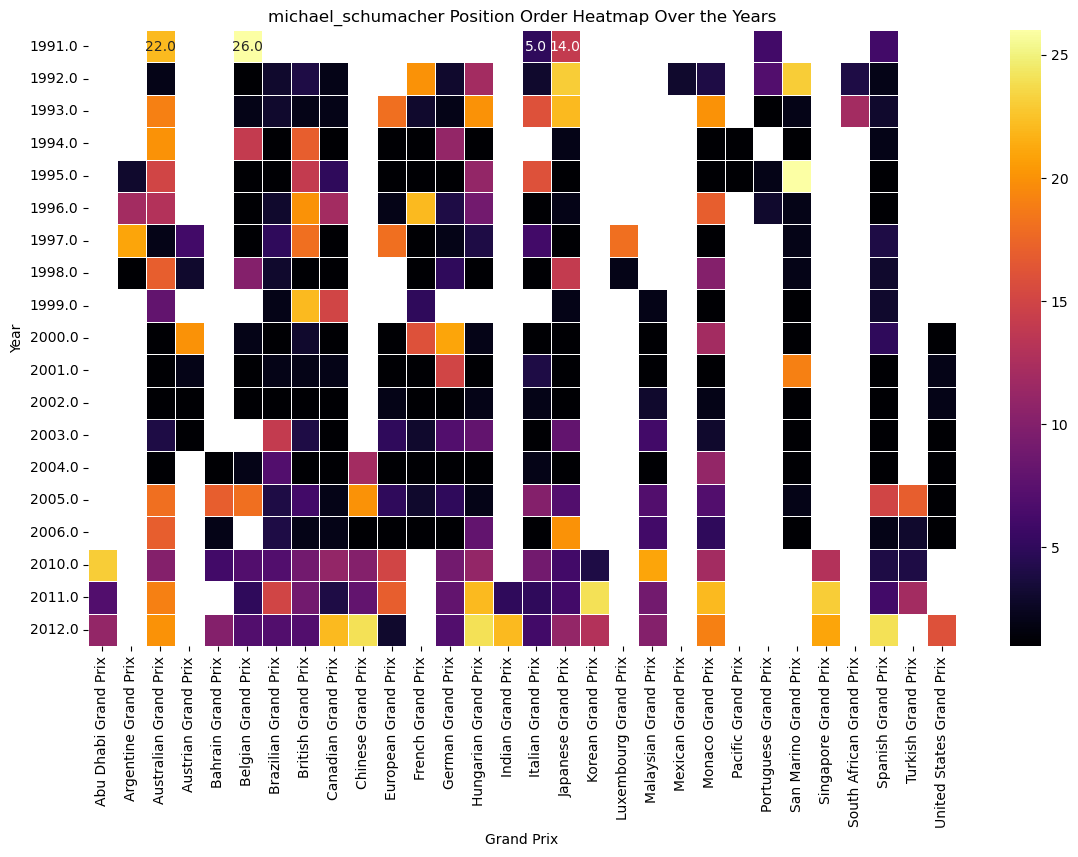

In [75]:
df_t2driver = df[(df['driver'] == 'michael_schumacher') & (df['position_order'].notnull())]
print("Number of rows for michael_schumacher:", len(df_t2driver))
heatmap_data = df_t2driver.pivot_table(index='year', columns='gp_name', values='position_order', aggfunc='mean')
print("Pivot table shape:", heatmap_data.shape)
plt.figure(figsize=(14, 8))
sb.heatmap(heatmap_data, cmap='inferno', annot=True, fmt=".1f", linewidths=.5)
plt.title("michael_schumacher Position Order Heatmap Over the Years")
plt.xlabel('Grand Prix')
plt.ylabel('Year')
plt.show()
